In [1]:
%%configure -f
{
    "conf": {
        "spark.jars.packages": "com.databricks:spark-xml_2.12:0.14.0",
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

In [2]:
sc.install_pypi_package("pandas==1.1.0")
sc.install_pypi_package("matplotlib==3.0.0")
from pyspark.sql.functions import ceil, col, count, desc, unix_timestamp, window
import matplotlib.pyplot as plot

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1653941471604_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
postsXmlPath = 's3://kn-praca-dyplomowa-sports/superuser_data/Posts.xml'
postsParquetPath = 's3://kn-praca-dyplomowa-sports/superuser_data/out/Posts'
postHistoryXmlPath = 's3://kn-praca-dyplomowa-sports/superuser_data/PostHistory.xml'
postHistoryParquetPath = 's3://kn-praca-dyplomowa-sports/superuser_data/out/PostHistory'
commentsXmlPath = 's3://kn-praca-dyplomowa-sports/superuser_data/Comments.xml'
commentsParquetPath = 's3://kn-praca-dyplomowa-sports/superuser_data/out/Comments'
usersXmlPath = 's3://kn-praca-dyplomowa-sports/superuser_data/Users.xml'
usersParquetPath = 's3://kn-praca-dyplomowa-sports/superuser_data/out/Users'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
from pyspark.sql.functions import length

(
spark
.read
.format('xml')
.option("rowTag", "row")
.load(postsXmlPath)
.select(
    col('_Id').alias('id'),
    col('_PostTypeId').alias('postTypeId'),
    col('_AcceptedAnswerId').alias('acceptedAnswerId'),
    (col('_CreationDate').cast('timestamp')).alias('creationDate'),
    col('_OwnerUserId').alias('ownerUserId'),
    col('_ParentId').alias('parentId'),
    col('_Score').alias('score'),
    col('_ViewCount').alias('viewCount'),
    col('_Body').alias('body'),
    col('_AnswerCount').alias('answerCount'),
    col('_Tags').alias('tags'),
    col('_Title').alias('title'),
)
.write
.mode('overwrite')
.format('parquet')
.option('path', postsParquetPath)
.save()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
from pyspark.sql.functions import length

posts = spark.read.parquet(postsParquetPath).select(
    'id',
    'postTypeId',
    'acceptedAnswerId',
    'creationDate',
    'ownerUserId',
    'parentId',
    'score',
    'viewCount',
    'body',
    'tags',
    'answerCount',
    'title'
).cache()

posts.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+---------------+------------------+--------------------+
|summary|               id|        postTypeId|  acceptedAnswerId|       ownerUserId|         parentId|             score|         viewCount|                body|           tags|       answerCount|               title|
+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+---------------+------------------+--------------------+
|  count|          1159934|           1159934|            192647|           1130323|           682102|           1159934|            470283|             1159934|         470283|            470283|              470283|
|   mean|818774.4867690748|1.6108951026523923| 747775.3927182879| 319091.3533591725|695777.3822038346| 2.781882417447889| 5775.5

In [14]:
questions = posts.filter(col('postTypeId') == 1).cache()
answers = posts.filter(col('postTypeId') == 2).cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
questions.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|     id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|
+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|1665063|         1|            null|2021-07-27 23:10:...|    1476016|    null|    0|       19|<p>I'm working in...|<microsoft-excel>...|          0|
|1665064|         1|         1665155|2021-07-27 23:24:...|      62286|    null|    0|      110|<p>I've written a...|<command-line><ff...|          1|
|1665066|         1|            null|2021-07-27 23:35:...|    1476043|    null|    1|       55|<p>My PC 'died' a...|<motherboard><pow...|          0|
|1665070|         1|            null|2021-07-28 00:33:...|    1476085|    null|    1|        9|<p>I 

In [ ]:
# PART A

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date

questions.withColumn('creationYear', year(questions.creationDate)).groupBy('creationYear').agg(count('*').alias('count')).orderBy('creationYear').toPandas().plot(
    title='Number of posts (questions) per year',
    x='creationYear',
    xlabel='year',
    y='count',
    ylabel='number of posts',
    kind='line',
    legend=False
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

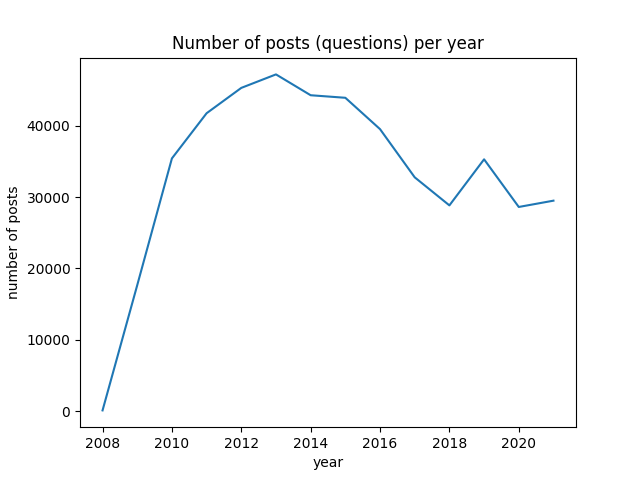

In [ ]:
%matplot plot

In [124]:
(
spark
.read
.format('xml')
.option("rowTag", "row")
.load(usersXmlPath)
.select(
    col('_Id').alias('id'),
    col('_Reputation').alias('reputation'),
    col('_DisplayName').alias('displayName'),
    col('_AccountId').alias('accountId'),
    (col('_CreationDate').cast('timestamp')).alias('creationDate')
)
.write
.mode('overwrite')
.format('parquet')
.option('path', usersParquetPath)
.save()
)

users = spark.read.parquet(usersParquetPath).cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [129]:
users.filter(col('accountId')<0).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------+-----------+---------+--------------------+
| id|reputation|displayName|accountId|        creationDate|
+---+----------+-----------+---------+--------------------+
| -1|         1|  Community|       -1|2009-07-12 22:51:...|
+---+----------+-----------+---------+--------------------+

In [126]:
users.show(5)
users.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------+------------+---------+--------------------+
| id|reputation| displayName|accountId|        creationDate|
+---+----------+------------+---------+--------------------+
| -1|         1|   Community|       -1|2009-07-12 22:51:...|
|  1|     23242| Jeff Atwood|        1|2009-07-12 22:51:...|
|  2|       363|Geoff Dalgas|        2|2009-07-12 22:51:...|
|  3|       111|Jarrod Dixon|        3|2009-07-12 22:51:...|
|  4|      1804|Joel Spolsky|        4|2009-07-12 22:51:...|
+---+----------+------------+---------+--------------------+
only showing top 5 rows

[Row(id=-1, reputation=1, displayName='Community', accountId=-1, creationDate=datetime.datetime(2009, 7, 12, 22, 51, 42, 563000)), Row(id=1, reputation=23242, displayName='Jeff Atwood', accountId=1, creationDate=datetime.datetime(2009, 7, 12, 22, 51, 42, 563000)), Row(id=2, reputation=363, displayName='Geoff Dalgas', accountId=2, creationDate=datetime.datetime(2009, 7, 12, 22, 51, 42, 563000)), Row(id=3, reputation=111, di

In [127]:
posts.show(5)
users.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+--------------------+
|     id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|               title|
+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+--------------------+
|1665062|         2|            null|2021-07-27 22:41:...|     432690| 1664879|    0|     null|<p><code>set -- *...|                null|       null|                null|
|1665063|         1|            null|2021-07-27 23:10:...|    1476016|    null|    0|       19|<p>I'm working in...|<microsoft-excel>...|          0|Mail to hyperlink...|
|1665064|         1|         1665155|2021-07-27 23:24:...|      62286|    null|    0|      110|<p>I've written a...|<command-line><ff...|        

In [ ]:
(
spark
.read
.format('xml')
.option("rowTag", "row")
.load(commentsXmlPath)
.select(
    col('_Id').alias('id'),
    col('_PostId').alias('postId'),
    col('_Score').alias('score'),
    col('_UserDisplayName').alias('userDisplayName'),
    col('_UserId').alias('userId'),
    (col('_CreationDate').cast('timestamp')).alias('creationDate')
)
.write
.mode('overwrite')
.format('parquet')
.option('path', commentsParquetPath)
.save()
)

comments = spark.read.parquet(commentsParquetPath).cache()

comments.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+-----------------+-------------------+--------------------+-----------------+
|summary|                id|           postId|              score|     userDisplayName|           userId|
+-------+------------------+-----------------+-------------------+--------------------+-----------------+
|  count|           1715009|          1715009|            1715009|               41838|          1672905|
|   mean|1288584.4733211312|861431.0809989918|0.37343535806517636|  2042484.2222222222|283587.2349553621|
| stddev| 760249.9015245036|475601.8808441576| 1.9892390586296196|  3527789.0424768096|315561.8448748035|
|    min|                32|                1|                  0|                 ...|               -1|
|    max|           2600318|          1691310|                365|              이광수|          1646746|
+-------+------------------+-----------------+-------------------+--------------------+-----------------+

In [ ]:
# PART B

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [130]:
from pyspark.sql.window import Window

windowSpecAgg  = Window.partitionBy("postTimeSinceUserJoined")
windowSpec  = Window.partitionBy("userId").orderBy(desc("postTimeSinceUserJoined"))

from pyspark.sql.functions import col,avg,sum,min,max,row_number 
users.alias('users').join(posts.alias('posts'), col('users.id') == col('posts.ownerUserId')) \
    .select(
        col('users.displayName').alias('userDisplayName'),
        col('users.id').alias('userId'),
        col('users.accountId').alias('accountId'),
        col('posts.creationDate').alias('postCreationDate'),
        col('users.creationDate').alias('userCreationDate')
    ) \
  .withColumn('postTimeSinceUserJoined', unix_timestamp('postCreationDate') - unix_timestamp('userCreationDate')) \
  .withColumn("row",row_number().over(windowSpec)) \
  .withColumn("max", max(col("postTimeSinceUserJoined")).over(windowSpecAgg)) \
  .filter(col('userId')>0) \
  .where(col("row")==1).select("userId","postCreationDate","userCreationDate","userDisplayName","max") \
  .orderBy(desc('postTimeSinceUserJoined')).show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+--------------------+--------------------+---------------+---------+
|userId|    postCreationDate|    userCreationDate|userDisplayName|      max|
+------+--------------------+--------------------+---------------+---------+
|  1686|2021-12-04 17:00:...|2009-07-15 17:38:...|       user1686|390957736|
|  2293|2021-12-04 18:49:...|2009-07-16 11:57:...|       leeand00|390898283|
|  2003|2021-12-02 09:46:...|2009-07-15 22:20:...|         Sergey|390741966|
|  2280|2021-11-29 13:41:...|2009-07-16 10:47:...|       Boldewyn|390452065|
|  2077|2021-11-26 21:17:...|2009-07-16 00:09:...|     Sinan Ünür|390258487|
|  2291|2021-11-24 10:15:...|2009-07-16 11:30:...|         talonx|390005098|
|  3015|2021-11-27 22:53:...|2009-07-20 13:56:...|        Zanchey|389955414|
|  2108|2021-11-22 23:35:...|2009-07-16 01:12:...|   Tony_Henrich|389917402|
|  3719|2021-11-30 20:08:...|2009-07-25 15:36:...| Peter Hahndorf|389766687|
|  2432|2021-11-21 20:43:...|2009-07-16 19:13:...|         pupeno|389755783|

In [ ]:
# PART C

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
higestScoredPosts = questions.orderBy(desc('score')).limit(1000)
lowestScoredPosts = questions.orderBy('score').limit(1000)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
higestScoredPosts.show(5)
lowestScoredPosts.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|    id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|
+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|149329|         1|            null|2008-09-17 15:39:...|       null|    null| 2372|  2956162|<p>How can I make...|        <http><curl>|          7|
|792607|         1|          792628|2014-08-05 09:36:...|     349115|    null| 2121|   245543|<p>I've inherited...|<windows-7><devic...|          3|
|209437|         1|          209608|2010-11-10 18:40:...|      37690|    null| 1719|  1144579|<p>I just started...|              <tmux>|         12|
|147027|         1|            null|2009-04-09 13:17:...|       null|    null| 1583|  1330503|<p>How can I

In [ ]:
from pyspark.sql.functions import split

higestScoredPostsWithTags = (
    higestScoredPosts
    .withColumn('tags', split('tags', '><'))
    .selectExpr(
        '*',
        "TRANSFORM(tags, value -> regexp_replace(value, '(>|<)', '')) AS tags_arr"
    )
)

lowestScoredPostsWithTags = (
    lowestScoredPosts
    .withColumn('tags', split('tags', '><'))
    .selectExpr(
        '*',
        "TRANSFORM(tags, value -> regexp_replace(value, '(>|<)', '')) AS tags_arr"
    )
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import explode

higestScoredPostsWithTags.withColumn('tag', explode('tags_arr')).show(5)
lowestScoredPostsWithTags.withColumn('tag', explode('tags_arr')).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+--------------------+--------------+
|    id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|            tags_arr|           tag|
+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+--------------------+--------------+
|149329|         1|            null|2008-09-17 15:39:...|       null|    null| 2372|  2956162|<p>How can I make...|      [<http, curl>]|          7|        [http, curl]|          http|
|149329|         1|            null|2008-09-17 15:39:...|       null|    null| 2372|  2956162|<p>How can I make...|      [<http, curl>]|          7|        [http, curl]|          curl|
|792607|         1|          792628|2014-08-05 09:36:...|     349115|    nu

In [ ]:
higestScoredPostsWithTags.withColumn('tag', explode('tags_arr')) \
.groupBy('tag') \
.agg(count('*').alias('numberOfTags')) \
.orderBy(desc('numberOfTags')) \
.show(10)

lowestScoredPostsWithTags.withColumn('tag', explode('tags_arr')) \
.groupBy('tag') \
.agg(count('*').alias('numberOfTags')) \
.orderBy(desc('numberOfTags')) \
.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+------------+
|          tag|numberOfTags|
+-------------+------------+
|      windows|         176|
|        linux|         152|
| command-line|          86|
|    windows-7|          79|
|        macos|          65|
|         bash|          62|
|   windows-10|          56|
|         unix|          45|
|google-chrome|          44|
|          ssh|          40|
+-------------+------------+
only showing top 10 rows

+---------------+------------+
|            tag|numberOfTags|
+---------------+------------+
|        windows|         123|
|      windows-7|         114|
|     networking|          68|
|          linux|          68|
|microsoft-excel|          67|
|     windows-10|          52|
|         memory|          51|
|            cpu|          50|
|     hard-drive|          44|
|      windows-8|          39|
+---------------+------------+
only showing top 10 rows

In [ ]:
higestScoredPosts.withColumn('bodyLength', length('body')).show(5)
lowestScoredPosts.withColumn('bodyLength', length('body')).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+----------+
|    id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|bodyLength|
+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+----------+
|149329|         1|            null|2008-09-17 15:39:...|       null|    null| 2372|  2956162|<p>How can I make...|        <http><curl>|          7|       177|
|792607|         1|          792628|2014-08-05 09:36:...|     349115|    null| 2121|   245543|<p>I've inherited...|<windows-7><devic...|          3|       396|
|209437|         1|          209608|2010-11-10 18:40:...|      37690|    null| 1719|  1144579|<p>I just started...|              <tmux>|         12|       388|
|147027|         1|            null|2009

In [ ]:
higestScoredPosts.withColumn('bodyLength', length('body')).agg(avg(col("bodyLength"))).show()
lowestScoredPosts.withColumn('bodyLength', length('body')).agg(avg(col("bodyLength"))).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+
|avg(bodyLength)|
+---------------+
|        600.631|
+---------------+

+---------------+
|avg(bodyLength)|
+---------------+
|        570.128|
+---------------+

In [ ]:
higestScoredPosts.agg(avg(col("answerCount"))).show()
lowestScoredPosts.agg(avg(col("answerCount"))).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+
|avg(answerCount)|
+----------------+
|           8.243|
+----------------+

+----------------+
|avg(answerCount)|
+----------------+
|            1.45|
+----------------+

In [ ]:
# PART D

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
totalNumberOfAnswers = answers.count()
totalNumberOfAnswers

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

682102

In [ ]:
posts.filter(col('acceptedAnswerId') == 670613).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|    id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|
+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|670560|         1|          670613|2013-11-06 20:31:...|     222470|    null|  -18|     1634|<p>Now, I know th...|<windows-xp><inte...|          2|
+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+

In [ ]:
posts.filter(col('id') == 670613).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+----+-----------+
|    id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|tags|answerCount|
+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+----+-----------+
|670613|         2|            null|2013-11-06 22:39:...|     270058|  670560|    8|     null|<p>This isn't goi...|null|       null|
+------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+----+-----------+

In [ ]:
answers.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+----+-----------+
|     id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|tags|answerCount|
+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+----+-----------+
|1665062|         2|            null|2021-07-27 22:41:...|     432690| 1664879|    0|     null|<p><code>set -- *...|null|       null|
|1665065|         2|            null|2021-07-27 23:28:...|     401553| 1665049|    0|     null|<ul>
<li>In Thund...|null|       null|
|1665067|         2|            null|2021-07-28 00:06:...|     210417| 1664980|    2|     null|<p>Disconnect the...|null|       null|
|1665068|         2|            null|2021-07-28 00:21:...|     256499|  648860|    0|     null|<p>AudioPick for ...|null|       null|
|1665071|         2|            null|2021-07-28 00:57:...|    

In [ ]:
questions.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|     id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|
+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+
|1665063|         1|            null|2021-07-27 23:10:...|    1476016|    null|    0|       19|<p>I'm working in...|<microsoft-excel>...|          0|
|1665064|         1|         1665155|2021-07-27 23:24:...|      62286|    null|    0|      110|<p>I've written a...|<command-line><ff...|          1|
|1665066|         1|            null|2021-07-27 23:35:...|    1476043|    null|    1|       55|<p>My PC 'died' a...|<motherboard><pow...|          0|
|1665070|         1|            null|2021-07-28 00:33:...|    1476085|    null|    1|        9|<p>I 

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number
windowDef = Window.partitionBy("questionId").orderBy(col("answerScore").desc())

questionsWithMaxScoredAnswers = answers.alias('answers') \
    .join(questions.alias('questions'), col('answers.parentId') == col('questions.id')) \
    .select(
        col('questions.id').alias('questionId'),
        col('answers.id').alias('maxScoredAnswerId'),
        col('answers.score').alias('answerScore'),
        col('questions.acceptedAnswerId').alias('acceptedAnswerId'),
        col('answers.parentId').alias('parentId'),
    ) \
    .filter(col('acceptedAnswerId').isNotNull()) \
    .withColumn("row",row_number().over(windowDef)) \
    .filter(col("row") == 1).drop("row")

questionsWithMaxScoredAnswers.show(5)
totalQuestionsWithMaxScoredAnswersCount = questionsWithMaxScoredAnswers.count()
questionsWithMaxScoredAnswersAsAcceptedAnswer = questionsWithMaxScoredAnswers.filter(col('maxScoredAnswerId') == col('acceptedAnswerId'))
questionsWithMaxScoredAnswersAsAcceptedAnswer.show(5)
questionsWithMaxScoredAnswersAsAcceptedAnswerCount = questionsWithMaxScoredAnswersAsAcceptedAnswer.count()
(totalQuestionsWithMaxScoredAnswersCount - questionsWithMaxScoredAnswersAsAcceptedAnswerCount) / totalQuestionsWithMaxScoredAnswersCount




VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+-----------+----------------+--------+
|questionId|maxScoredAnswerId|answerScore|acceptedAnswerId|parentId|
+----------+-----------------+-----------+----------------+--------+
|        94|              103|         15|             103|      94|
|       274|             1830|          7|          652045|     274|
|       385|             2530|         33|            2530|     385|
|       463|             5285|          3|            5285|     463|
|       541|              553|          7|             553|     541|
+----------+-----------------+-----------+----------------+--------+
only showing top 5 rows

+----------+-----------------+-----------+----------------+--------+
|questionId|maxScoredAnswerId|answerScore|acceptedAnswerId|parentId|
+----------+-----------------+-----------+----------------+--------+
|        94|              103|         15|             103|      94|
|       385|             2530|         33|            2530|     385|
|       4

In [ ]:
# PART E

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
questionsWithAnswers = answers.alias('answers').join(questions.alias('questions'), col('answers.parentId') == col('questions.id')) \
    .select(
        col('questions.id').alias('questionId'),
        col('answers.id').alias('maxScoredAnswerId'),
        col('answers.score').alias('answerScore'),
        col('questions.answerCount').alias('answerCount'),
        col('questions.acceptedAnswerId').alias('acceptedAnswerId'),
        col('answers.parentId').alias('parentId'),
    ) \
    .filter(col('answerCount') > 0).cache()

questionsWithAnswers.describe().show()

questionsWithAcceptedAnswers = questionsWithAnswers.filter(col('acceptedAnswerId').isNotNull()).cache()

questionsWithAcceptedAnswers.describe().show()




VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|       questionId| maxScoredAnswerId|       answerScore|       answerCount| acceptedAnswerId|         parentId|
+-------+-----------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|           682102|            682102|            682102|            682102|           371651|           682102|
|   mean|695777.3822038346| 782710.2747682898|   2.8990913382456|2.9147400242192516| 641286.846030281|695777.3822038346|
| stddev|480105.0488046616|491727.08406404505|14.162407723530494|2.6758922705436534|473208.4261636393|480105.0488046616|
|    min|                1|                25|               -14|                 1|               42|                1|
|    max|          1691313|           1691314|              2761|                40|          1691286|          1691313|
+-------+-----------------+-----

In [ ]:
# PART F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
postsWithExplodedTags = (
    posts \
    .withColumn('tags', split('tags', '><')) \
    .selectExpr(
        '*',
        "TRANSFORM(tags, value -> regexp_replace(value, '(>|<)', '')) AS tags_arr"
    )
) \
.withColumn('tag', explode('tags_arr')).cache()

postsWithExplodedTags.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+--------------------+------------------+
|     id|postTypeId|acceptedAnswerId|        creationDate|ownerUserId|parentId|score|viewCount|                body|                tags|answerCount|            tags_arr|               tag|
+-------+----------+----------------+--------------------+-----------+--------+-----+---------+--------------------+--------------------+-----------+--------------------+------------------+
|1665063|         1|            null|2021-07-27 23:10:...|    1476016|    null|    0|       19|<p>I'm working in...|[<microsoft-excel...|          0|[microsoft-excel,...|   microsoft-excel|
|1665063|         1|            null|2021-07-27 23:10:...|    1476016|    null|    0|       19|<p>I'm working in...|[<microsoft-excel...|          0|[microsoft-excel,...|worksheet-function|
|1665063|         1|            null|2021-07-27 23

In [ ]:
postsWithExplodedTags.groupBy('tag').sum('viewCount').orderBy(desc('sum(viewCount)')).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+--------------+
|            tag|sum(viewCount)|
+---------------+--------------+
|        windows|     401157172|
|      windows-7|     389098929|
|          linux|     280800662|
|     windows-10|     173364719|
|microsoft-excel|     142952112|
+---------------+--------------+
only showing top 5 rows

In [ ]:
# PART G

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import when, lit

postsByTagInTime = (
   postsWithExplodedTags
    .groupBy(
        window('creationDate', '1 week')
    )
    .agg(
        sum(when(col('tag') == 'windows', lit(1)).otherwise(lit(0))).alias('windows'),
        sum(when(col('tag') == 'windows-7', lit(1)).otherwise(lit(0))).alias('windows-7'),
        sum(when(col('tag') == 'linux', lit(1)).otherwise(lit(0))).alias('linux'),
        sum(when(col('tag') == 'windows-10', lit(1)).otherwise(lit(0))).alias('windows-10'),
        sum(when(col('tag') == 'microsoft-excel|', lit(1)).otherwise(lit(0))).alias('microsoft-excel|'),
    )
    .withColumn('date', col('window.start').cast('date'))
    .orderBy('date') 
).toPandas()

postsByTagInTime.plot(
    x='date', 
    figsize=(12, 6), 
    title='Number of posts per week by tag',
    legend=True,
    xlabel='Date',
    ylabel='Number of posts per week',
    kind='line'
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

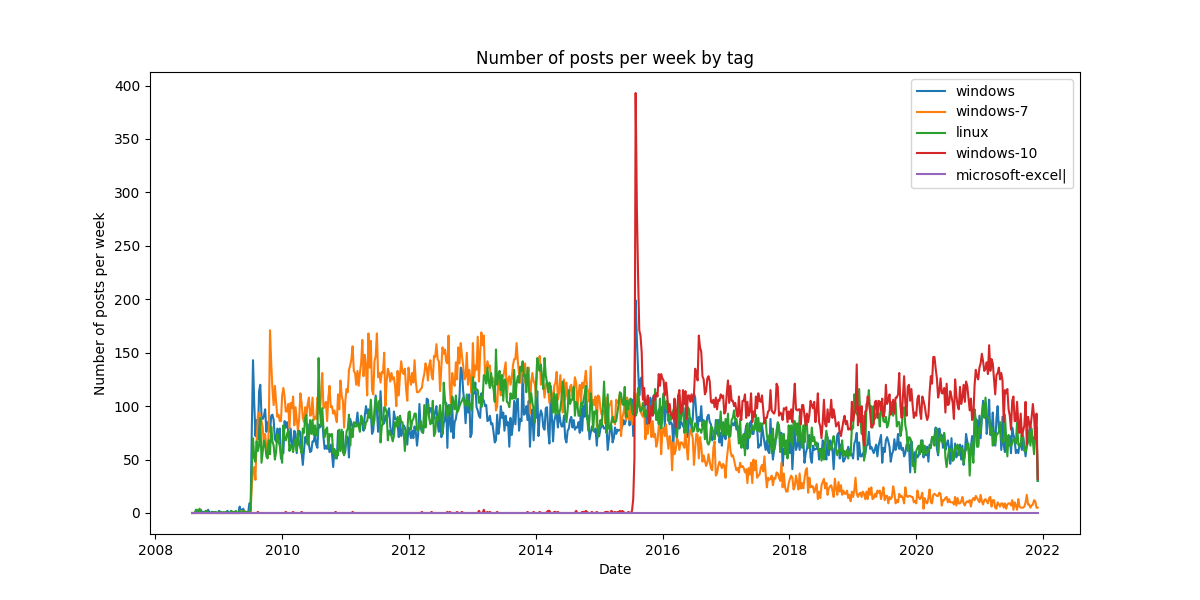

In [ ]:
%matplot plot

In [ ]:
# PART H

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [107]:
from pyspark.sql.functions import regexp_replace, lower

stopWordsList = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","noone","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","etal","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]

postsWithExplodedTitleWords = (
    posts \
    .withColumn('replacedTitle',regexp_replace(col("title"), "[(0-9)]+", " "))
    .withColumn('replacedTitle',regexp_replace(col("replacedTitle"), "[^\w]+", " "))
    .withColumn('splitTitle', split('replacedTitle', ' ')) \
    .select(
        col('title').alias('title'),
        col('replacedTitle').alias('replacedTitle'),
        col('splitTitle').alias('splitTitle')
    ) \
)

postsWithExplodedTitleWords.withColumn('word', explode('splitTitle')) \
    .groupBy('word') \
    .agg(count('*').alias('wordCount')) \
    .orderBy(desc('wordCount')) \
    .withColumn('word', lower(col('word'))) \
    .filter(col('word').isin(stopWordsList) == False) \
    .filter(col('word') != '') \
    .show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+---------+
|   word|wordCount|
+-------+---------+
|windows|    69235|
|   file|    24986|
|  files|    17490|
|windows|    14595|
|  excel|    13595|
|  linux|    13240|
|  drive|    12130|
|command|    10822|
|network|    10756|
| ubuntu|    10287|
+-------+---------+
only showing top 10 rows

In [108]:
# PART I

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [113]:
usersThatHaveAnyPosts = posts.filter(col('ownerUserId').isNotNull()).select('ownerUserId').distinct().count()
allUsers = users.count()
(allUsers-usersThatHaveAnyPosts)/allUsers

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.5313570161923312

In [121]:
questions.alias('questions') \
    .join(answers.alias('answers'), col('questions.acceptedAnswerId') == col('answers.id')) \
    .select(
        col('questions.id'),
        col('questions.creationDate').alias('questionDate'),
        col('answers.creationDate').alias('acceptedAnswerDate')
    ) \
    .withColumn('timeToAcceptedAnswer', unix_timestamp('acceptedAnswerDate') - unix_timestamp('questionDate')) \
    .agg(avg(col("timeToAcceptedAnswer"))/3600/24).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------------+
|((avg(timeToAcceptedAnswer) / 3600) / 24)|
+-----------------------------------------+
|                        29.04407220317314|
+-----------------------------------------+